In [1]:
# import required packages
import matplotlib.pyplot as plt
import pandas as pd
from imutils import paths

In [2]:
# input image paths
training_images = list(paths.list_images('../Input_Files/Training_Images/'))
testing_images = list(paths.list_images('../Input_Files/Testing_Images/'))

In [3]:
# get image labels
training_labels = []
testing_labels = []

for training_image in training_images:
    training_labels.append(training_image.split('/')[-2])
    
for testing_image in testing_images:
    testing_labels.append(testing_image.split('/')[-2])


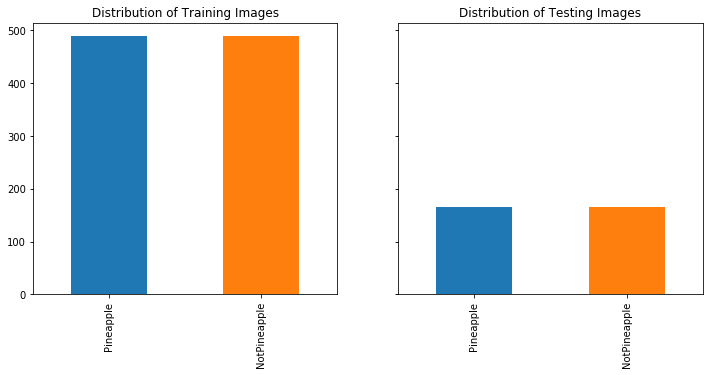

In [4]:
# images distribution
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(12,5))
pd.Series(training_labels).value_counts().plot('bar', ax=ax[0], title='Distribution of Training Images')
pd.Series(testing_labels).value_counts().plot('bar', ax=ax[1], title='Distribution of Testing Images')
fig.savefig('Report_Images/Image_Labels_Distribution.png', bbox_inches='tight')

In [5]:
# import required packages
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
# read accuracy data
acc = pd.read_csv('../Output_Files/Save_Output_Accuracy/Pineapple-NotPineapple_accuracy.csv')
acc = acc.iloc[:,1:3]
acc

,model_name,testing_accuracy
0,NotPineapple_LeNet_25x25,0.888554
1,NotPineapple_LeNet_50x50,1.000000
2,NotPineapple_LeNet_100x100,0.987952
3,NotPineapple_FullConn_25x25,0.780120
4,NotPineapple_FullConn_50x50,0.554217
5,NotPineapple_FullConn_100x100,0.500000
6,NotPineapple_CustomConv_25x25,0.804217
7,NotPineapple_CustomConv_50x50,0.807229
8,NotPineapple_CustomConv_100x100,0.906627


In [7]:
acc['architecture'] = acc['model_name'].str.split('_', expand=True)[1]
acc['resize'] = acc['model_name'].str.split('_', expand=True)[2]
acc['pixels'] = acc['resize'].str.split('x', expand=True)[1]
acc['pixels'] = acc['pixels'].astype(int)
acc = acc.sort_values('pixels')
acc.reset_index(drop=True, inplace=True)
acc

,model_name,testing_accuracy,architecture,resize,pixels
0,NotPineapple_LeNet_25x25,0.888554,LeNet,25x25,25
1,NotPineapple_FullConn_25x25,0.780120,FullConn,25x25,25
2,NotPineapple_CustomConv_25x25,0.804217,CustomConv,25x25,25
3,NotPineapple_LeNet_50x50,1.000000,LeNet,50x50,50
4,NotPineapple_FullConn_50x50,0.554217,FullConn,50x50,50
5,NotPineapple_CustomConv_50x50,0.807229,CustomConv,50x50,50
6,NotPineapple_LeNet_100x100,0.987952,LeNet,100x100,100
7,NotPineapple_FullConn_100x100,0.500000,FullConn,100x100,100
8,NotPineapple_CustomConv_100x100,0.906627,CustomConv,100x100,100


In [8]:
acc_final = acc[['pixels', 'architecture', 'testing_accuracy']]
acc_final

,pixels,architecture,testing_accuracy
0,25,LeNet,0.888554
1,25,FullConn,0.780120
2,25,CustomConv,0.804217
3,50,LeNet,1.000000
4,50,FullConn,0.554217
5,50,CustomConv,0.807229
6,100,LeNet,0.987952
7,100,FullConn,0.500000
8,100,CustomConv,0.906627


In [9]:
acc_pivot = acc_final.pivot(index='pixels', columns='architecture', values='testing_accuracy')
acc_pivot

architecture,CustomConv,FullConn,LeNet
pixels,,,
25,0.804217,0.780120,0.888554
50,0.807229,0.554217,1.000000
100,0.906627,0.500000,0.987952


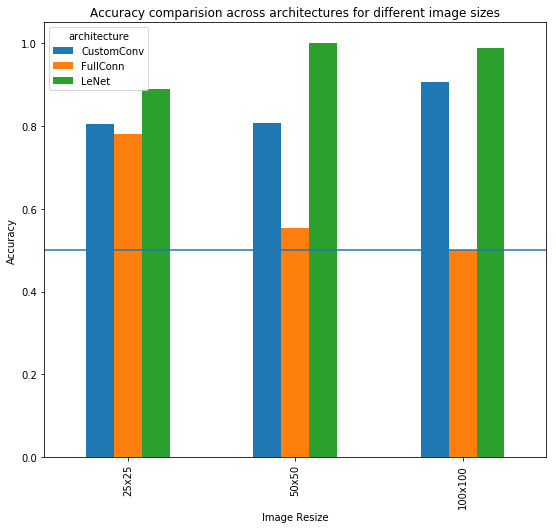

In [10]:
fig, ax = plt.subplots(figsize=(9,8))
acc_pivot.plot.bar(ax=ax)
ax.set(xlabel='Image Resize', 
       ylabel='Accuracy', 
       title='Accuracy comparision across architectures for different image sizes')
ax.set_xticklabels(['25x25', '50x50', '100x100'])
ax.axhline(y=0.5)
fig.savefig('Report_Images/Accuracy_Comparision_Plot.png')